#Twitter Sentiment Analysis

Twitter sentiment analysis is the task of analyzing whether a post is negative, positive, or neutral. We are doing textual sentiment analysis here, but there is also faical sentiment analysis (analyzing how a person is feeling through visuals.)

Sentiment analysis is important because it can help us understand customer feedback, monitor the reputation of our brand, conduct political analysis, conduct crisis management, and conduct marketing research.

F1 Scores: To evaluate our sentiment analysis, we will use the F1 score eval metric. The confusion matrix allows us to classify predictions made by the model as true positives, true negatives, false positives, and false negatives. We can then find the F1 score through the harmonic average. (There is also the formulas for precision and recall when you search up precision, recall, and F1 scores. )

We will conduct Twitter sentiment analysis through three classifiers: Logistic Regression, Naive Bayes, and SVM along with using Term-Frequency - Inverse Document Frequency (TF-IDF).

Logistic Regression:
- In linear regression: y = mx + b, x is the features, m is the weights(coefficients) and b is the bias. Do this until the mean squared error(or some other metric such as mae) is minimized.
- In logistic regression: The difference between classification and regission is that regression outputs a number while classification outputs a category. So logistic regression is linear regression on categorical data. (feature space)

Since you can't put a sentence into a feature space, you need to convert to a vector (or something) to put into the feature space. The process of doing that is called feature extraction. One method of feature extraction is TF-IDF.

The idea behind TF-IDF is that you want to represent words as frequency in their document, in our case, a document is a tweet. It is based on the idea that rare words contain more information about the content of a document than words that are used many times throughout all the documents.

A problem with scoring word frequency is that highly frequent words start to dominate in the document, but may not contain as much “informational content” to the model as rarer but perhaps domain specific words. One approach is to rescale the frequency of words by how often they appear in all documents, so that the scores for frequent words that are also frequent across all documents are penalized.

Now, we have the features that we can put in the feature space. For example, if red is angry, and they all cluster up somewhere, maybe that is way to predict angry posts.

KNN (K Nearest Neighbors) Classifier:

X-Y-Z setup. KNN is a type of clustering algorithm for making decisions. You make your decision based on the proximity to other samples(clusters). (If the 5 nearest one is 3 red and 2 blues, then based on majority voting the classification is going to be red - which is angry. ) K also cannot be divisible by 2 (so that there are no 'ties').

This is one example of how machine learning works:

Dataset --> neural network(encoder only) --> embeddings --> K Nearest Neighbors on the embeddings(and then you plot it on the feature space)

Encoder: input x goes to layer 1, 2, 3... There is also an idea of taking an input and linearly projecting it to an embedding through a linear/dense layer.Encoder here is like a convlutional neural network or a stack of linear layers, but one linear layer is just called a projection.  

Naive Bayes:

The Naive Bayes classifier is purely based on probabilities. We are basically of trying to find the probability of the label based on the input features.

For example, given a dataset, P(Rainy day and No golf) is 3/15, P(Rainy Yes) is 2/15, P(Yes) is 9/15(no is 6/15) and P(Rainy) is 5/15. The Naive Bayes classifier is going to calculate P(x|y)*P(y)/P(x), or 2/15 * 9/15 / 5/15 for yes and 3/15 * 6/15 / 10/15 for no, and compare which is bigger.

Support Vector Machine:

Linear regression, but make it a thick line, and you want to maximize the margin distance. (Similar to contrasted learning - if you have a set of datapoints with a classes, you can convert to having them as far apart as possible - maximizing the inter-class difference. In SVM, we are essentially maximizing the inter-class distance. We are doing that so that the separate classes and clusters are more differentiable. )

###Twitter Sentiment Project

We will try to implement a NLP Twitter sentiment analysis model that will conduct sentiment classification of tweets. We will be classifying tweets into positive, negative, and neutral tweets.

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

###Loading the dataset

In [ ]:
#Importing the dataset

!unzip /content/drive/MyDrive/tweets.zip

Archive:  /content/drive/MyDrive/tweets.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
import pandas as pd
import numpy as np
col_names = ["target", "ids", "date", "flag", "user", "text"]
df = pd.read_csv('training.1600000.processed.noemoticon.csv',
            encoding = "ISO-8859-1",
            names=col_names) #You always want to have 'df' in the name(so that you know its a dataframe).

In [ ]:
df.head()
#We have the text and the target, which is the sentiment.

,target,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
2,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
3,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
4,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."


In [ ]:
df1 = df.sample(10000)


In [ ]:
np.unique(df1['target'], return_counts = True)

(array([0, 4]), array([5015, 4985]))

###Preprocessing

We want to:
1. Remove punctuation
2. Lowercase everything
3. Stop word(and, the...) removal
4. Lemmatization

(Also removing numeric numbers)

In [ ]:
#Removing punctuation:
import string
import re
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
df1['text']= df1['text'].apply(lambda x: cleaning_punctuations(x))
df1['text'].tail()

#Changing data to lowercase:
df1['text']=df1['text'].str.lower()

#Definiting stop-words:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

#Removing stop words:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
df1['text'] = df1['text'].apply(lambda text: cleaning_stopwords(text))

#Removing numeric values:

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
df1['text'] = df1['text'].apply(lambda x: cleaning_numbers(x))

#Applying stemming (similar to lemmatization)

import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
df1['text']= df1['text'].apply(lambda x: stemming_on_text(x))



In [ ]:
df1['text'].head()

515475             hard cope atopy three children eleahbaant
1514558                                   jakepress watching
1270551      jameskobielus flexibivisualizations  chars less
249933     ardeming sad isnt like know soon wont ww veter...
1409197    agenda k shoulders core write birthday bbq bir...
Name: text, dtype: object

###Plotting a cloud of words!!

Just because its cool.

Task 1 --> Get the negative data

In [ ]:
data_neg = df1.loc[df1['target'] == 0]['text']
data_pos = df1.loc[df1['target'] == 4]['text']

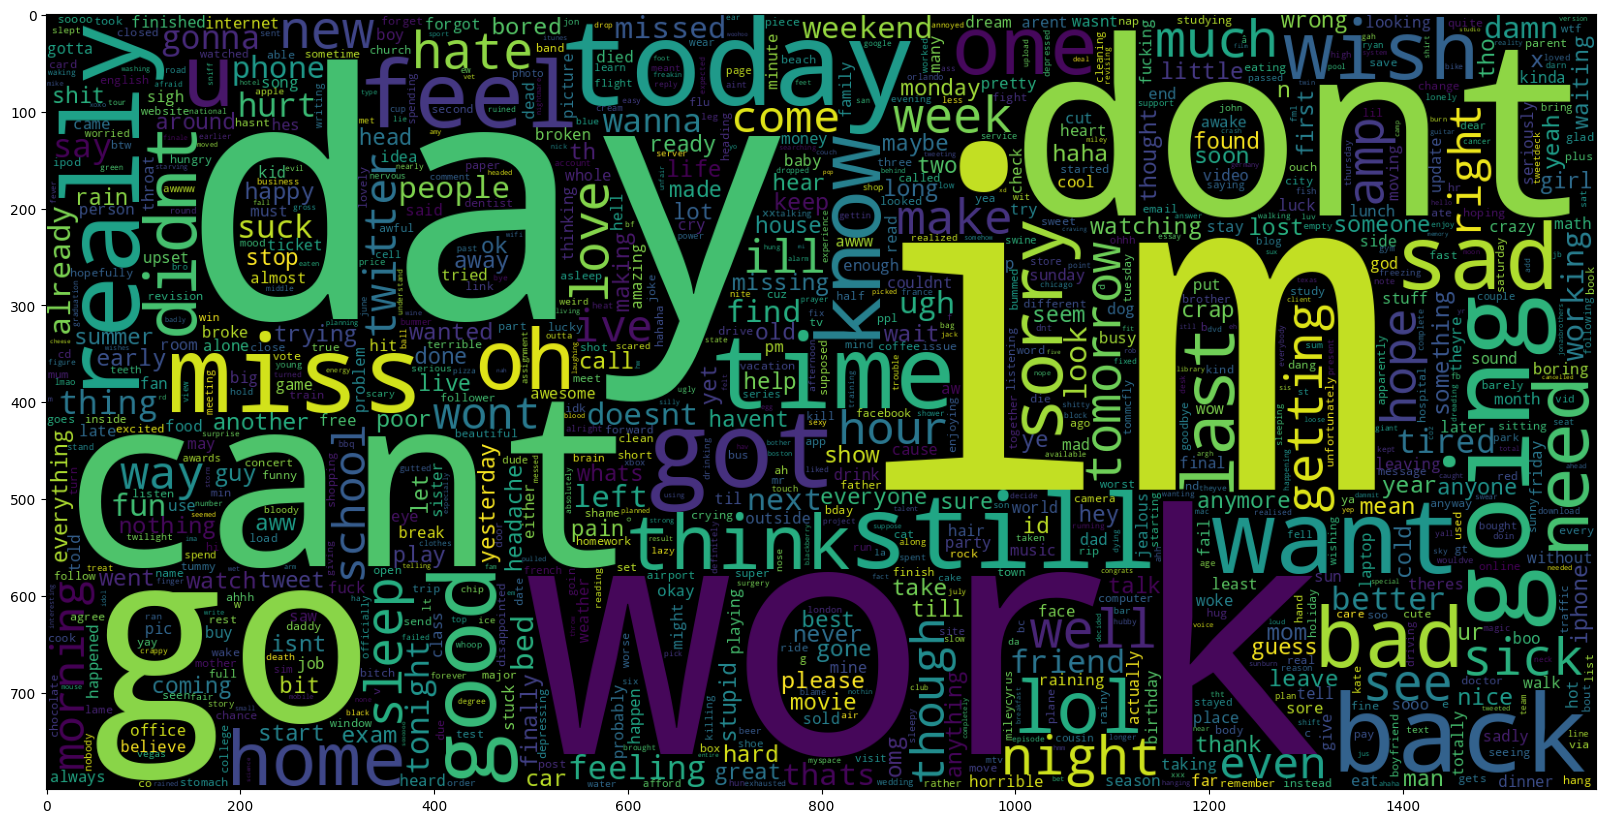

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

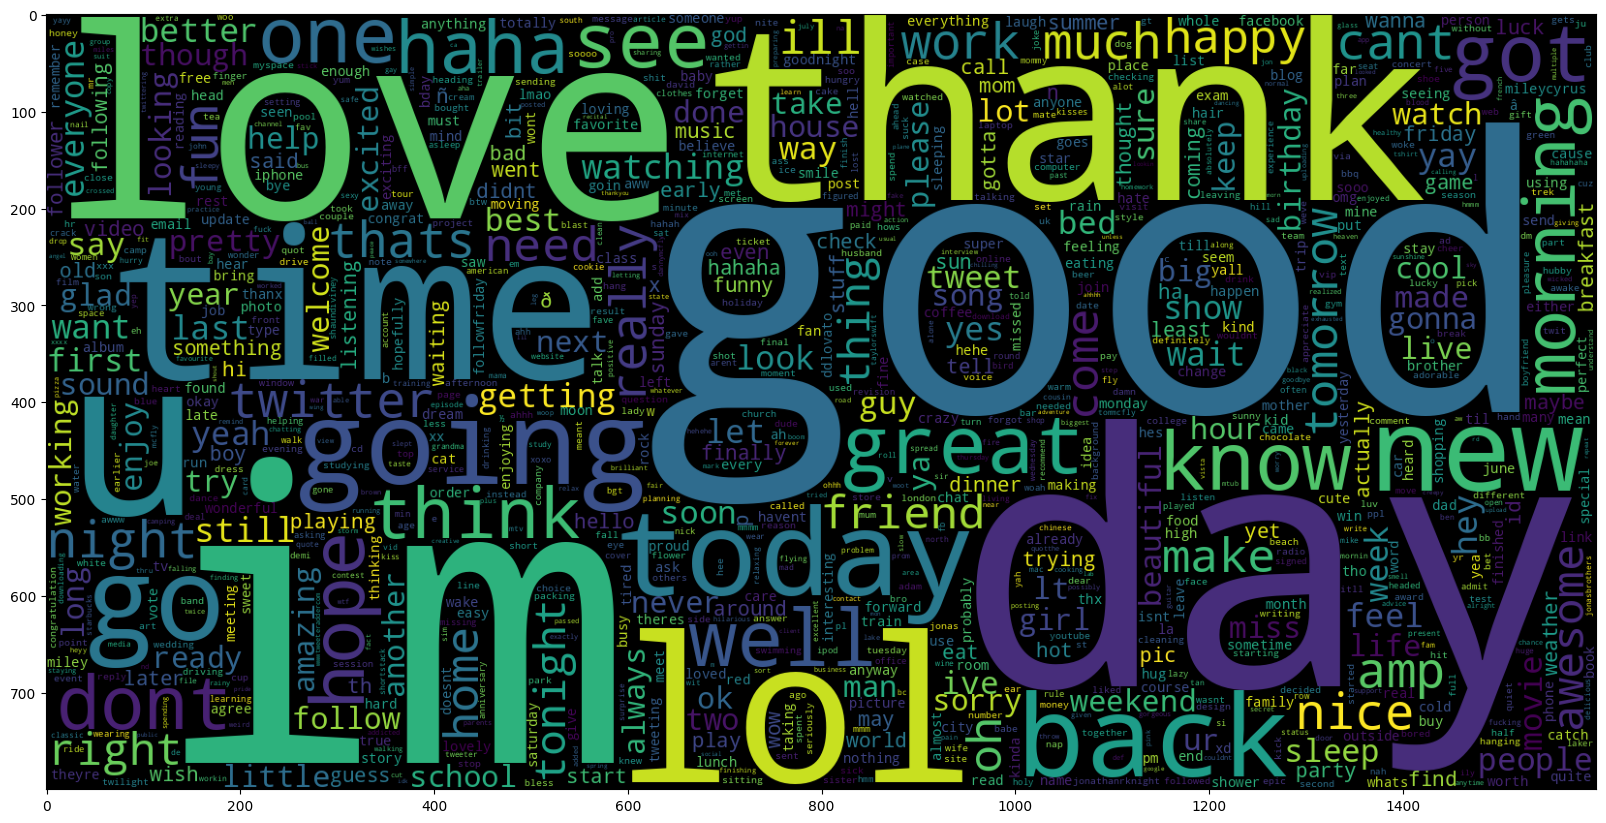

In [ ]:
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc)

In [ ]:
#Separating the datasets
X=df1.text
y=df1.target

# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.05, random_state =26105111)

In [ ]:
print(X)

0    bad disgusting ideology
Name: text, dtype: object


###TF-IDF Feature Extraction

In [ ]:
#This is the TF-IDF Vectorizer - which is performing the TF-IDF that we talked about previously.
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500)
vectoriser.fit(X_train)

#Now, we are transforming the dataset using the TF-IDF:
X_train = vectoriser.transform(X_train) #This is the text
X_test  = vectoriser.transform(X_test) #This is the target

In [ ]:
print(X_train[0])

  (0, 351)	0.39188477399686383
  (0, 314)	0.3664750553866822
  (0, 310)	0.28189050832360807
  (0, 298)	0.28189050832360807
  (0, 250)	0.35432252230066336
  (0, 203)	0.3526532318405339
  (0, 86)	0.34715090494930656
  (0, 84)	0.4275223243044402


In [ ]:
print(X_train)

NameError: name 'x_train' is not defined

###Model Evaluation:

We will use this model evaluation function to check the accuracy of the model, the confusion matrix with the plot, and the ROC-AUC Curve (Its a curve that you can use for a binary clasification problem. Plotting true positive against false positive. Ideal ROC curve would be a right angle. ) (The ROC is measuring how distinguisible the classes are to the model by assigning class labels based on different threshold values.).

(For the AUC curve, it just quantifies the area under the ROC curve(max is 1.0))

ROC Classification is ONLY for binary classification, because it checks the ratio between true positives and false positives.

In [ ]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

##MODEl 1: The Naive Bayes model

              precision    recall  f1-score   support

           0       0.69      0.68      0.68       232
           4       0.72      0.74      0.73       268

    accuracy                           0.71       500
   macro avg       0.71      0.71      0.71       500
weighted avg       0.71      0.71      0.71       500



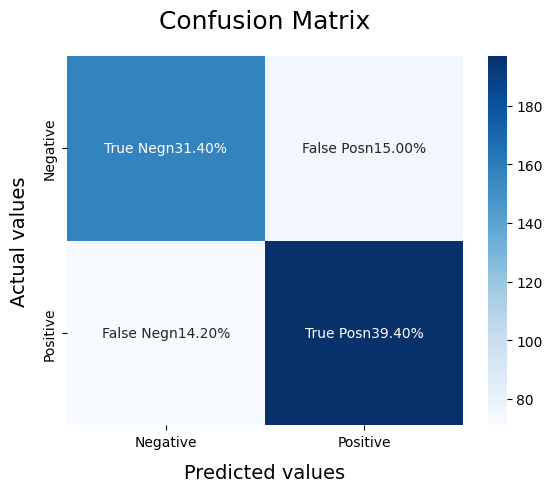

In [ ]:
BNBmodel = BernoulliNB() # We have already imported the Bernoulli Naives Bayes classifier.
#We are just instantiating the class.
BNBmodel.fit(X_train, y_train) #We are now fitting dataset to the model and calculating the probabilities(with the formula we talked about).
model_Evaluate(BNBmodel) #This is putting it through the evaluation function defined above.
y_pred1 = BNBmodel.predict(X_test) #Redundant, but used for graphing the ROC-AUC curve.

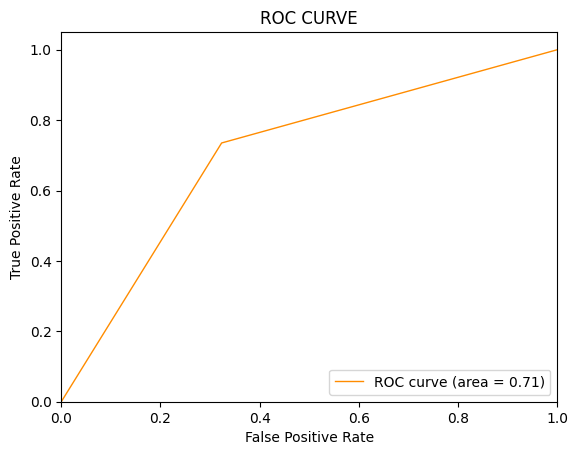

In [ ]:
#Plot the ROC-AUC(ROC) curve for the Naive Bayes model results:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1, pos_label=4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

#To put it simply - its pretty far from a right angle. It is rather close to just a diagonal - which is just chance.

##MODEL 2: SVC Model

              precision    recall  f1-score   support

           0       0.69      0.69      0.69       232
           4       0.73      0.72      0.73       268

    accuracy                           0.71       500
   macro avg       0.71      0.71      0.71       500
weighted avg       0.71      0.71      0.71       500



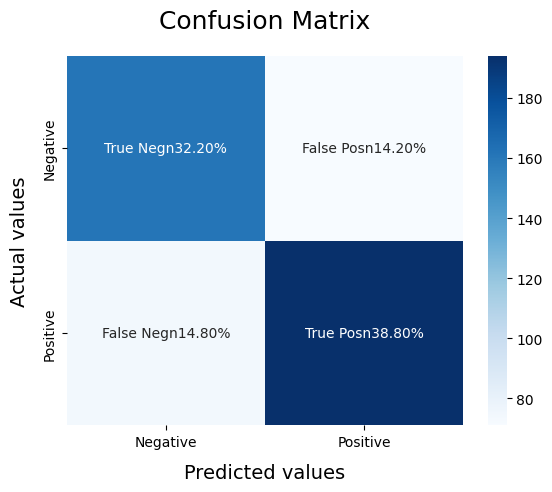

In [ ]:
SVCmodel = LinearSVC() #We are instantiating the model here
SVCmodel.fit(X_train, y_train) # We are fitting the dataset into the model here.
model_Evaluate(SVCmodel) #Putting the model through the model_Evaluate function.
y_pred2 = SVCmodel.predict(X_test) #Again, this is most likely for the SVC-AUC curve graphing.

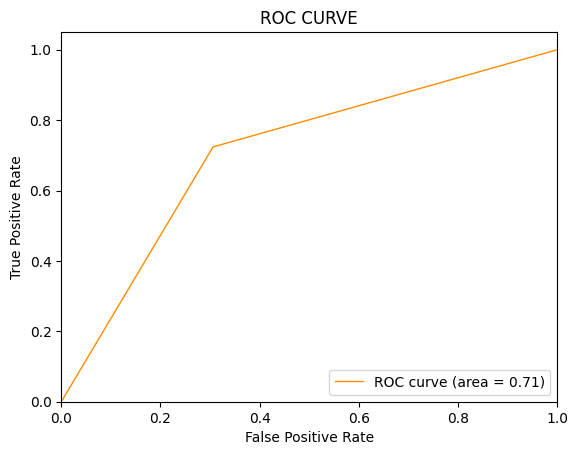

In [ ]:
#Plotting the ROC-AUC curve:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2, pos_label=4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##MODEL 3: Logistic Regression

              precision    recall  f1-score   support

           0       0.69      0.71      0.70       232
           4       0.74      0.72      0.73       268

    accuracy                           0.72       500
   macro avg       0.71      0.72      0.71       500
weighted avg       0.72      0.72      0.72       500



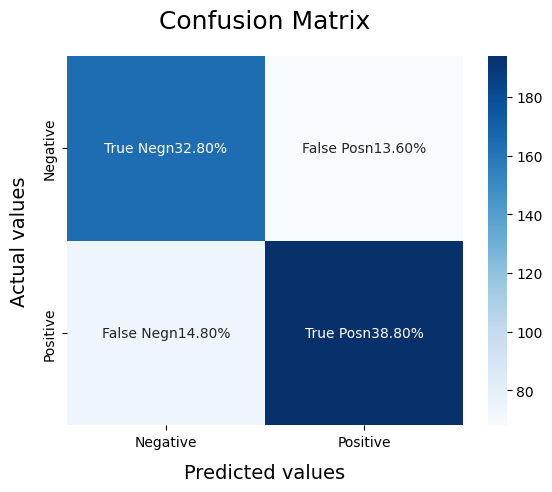

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1) #Instantiating the model
LRmodel.fit(X_train, y_train) #Fitting the model
model_Evaluate(LRmodel) #Passing it through model_Evaluate
y_pred3 = LRmodel.predict(X_test) #For ROC-AUC Curve.

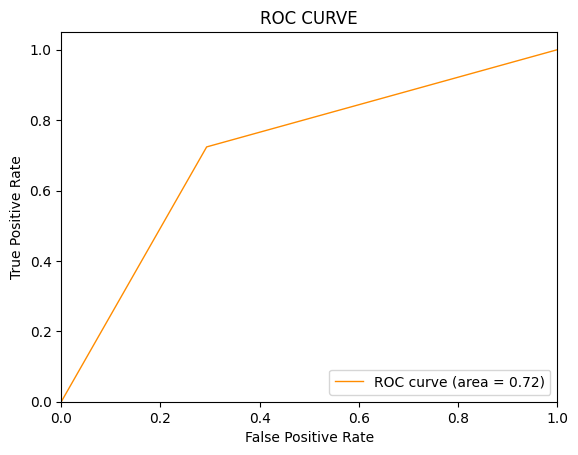

In [ ]:
#Plotting the ROC-AUC curve:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3, pos_label=4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

(Task 2)
##MODEL 4: A K Nearest Neighbors Classifier:

              precision    recall  f1-score   support

           0       0.56      0.76      0.64       232
           4       0.70      0.48      0.57       268

    accuracy                           0.61       500
   macro avg       0.63      0.62      0.60       500
weighted avg       0.63      0.61      0.60       500



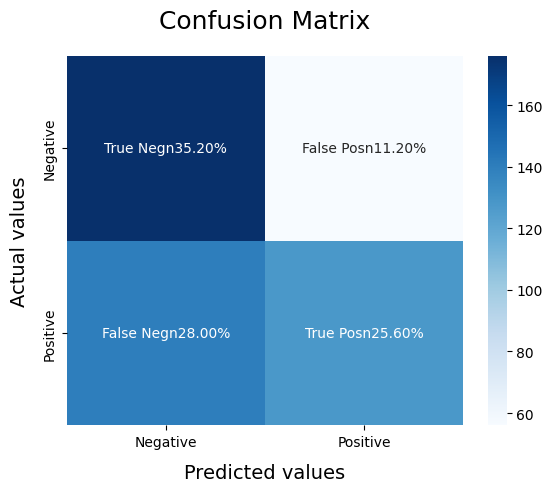

In [ ]:
import sklearn
from import KNeighborsClassifier

KNNmodel = KNeighborsClassifier(n_neighbors = 5) #Instantiating the model
#The n_neighbors is a hyperparameter, and finding the right hyperparameter could be very time consuming.
#There is actually a way to optimize finding the best hyperparameter for your model, and that is called gridsearchcv(maybe look into that in the future).
KNNmodel.fit(X_train, y_train) #Fitting the model
model_Evaluate(KNNmodel) #Passing it through model_Evaluate
y_pred4 = KNNmodel.predict(X_test) #For ROC-AUC Curve.

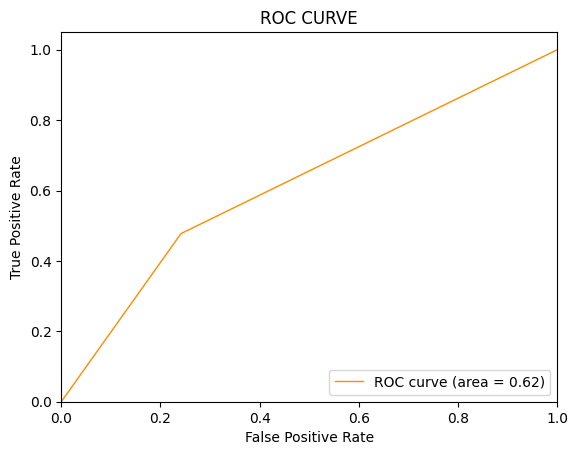

In [ ]:
#Plotting the ROC-AUC curve:

from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred4, pos_label=4)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

##Inference

In [ ]:
input_df = pd.DataFrame({'text': ['This is a very bad and disgusting ideology']})

In [ ]:
#Removing punctuation:
import string
import re
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
input_df['text']= input_df['text'].apply(lambda x: cleaning_punctuations(x))
input_df['text'].tail()

#Changing data to lowercase:
input_df['text']=input_df['text'].str.lower()

#Definiting stop-words:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

#Removing stop words:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
input_df['text'] = input_df['text'].apply(lambda text: cleaning_stopwords(text))

#Removing numeric values:

def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
input_df['text'] = input_df['text'].apply(lambda x: cleaning_numbers(x))

#Applying stemming (similar to lemmatization)

import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
input_df['text']= input_df['text'].apply(lambda x: stemming_on_text(x))



In [ ]:
#Separating the datasets
X=input_df.text

#Now, we are transforming the dataset using the TF-IDF:
X_inference  = vectoriser.transform(X) #This is the target

In [ ]:
y_pred5 = BNBmodel.predict(X_inference)
print(y_pred5)

[0]
